# Your info

Full name: Babak Behkam Kia

Student ID: 98521099

# Q1. Kohonen

In [ ]:
# Q1_graded
from tensorflow import keras
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Q1_graded
x_train = x_train/255

In [ ]:
# Q1_graded
unique, counts = np.unique(y_train, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

[[   0 5923]
 [   1 6742]
 [   2 5958]
 [   3 6131]
 [   4 5842]
 [   5 5421]
 [   6 5918]
 [   7 6265]
 [   8 5851]
 [   9 5949]]


In [ ]:
# Q1_graded
import random

mnist_dict = {
              0:[],
              1:[],
              2:[],
              3:[],
              4:[],
              5:[],
              6:[],
              7:[],
              8:[],
              9:[]
             }

for i in range(len(y_train)):
    mnist_dict[y_train[i]].append(i)

indexes = []

for i in range(10):
    indexes += random.sample(mnist_dict[i], 500)
    
print(len(indexes))

5000


In [ ]:
# Q1_graded
inputs = x_train[indexes].reshape(5000,-1)

inputs.shape

(5000, 784)

In [ ]:
# Q1_graded
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)


# Hyper Parameters:
n = 5000
neurons = 400
image_shape = (28,28)
flatten_image_shape = image_shape[0] * image_shape[1]
grid_shape = (int(np.sqrt(neurons)),int(np.sqrt(neurons)))
learning_rate = 0.1
radius = 1
epochs = 600


def calculate_distance(a, index):
    i,j = np.indices(a, sparse=True)
    return (i-index[0])**2 + (j-index[1])**2

def convert_1D_2D(a):
    a0 = (int) (a/grid_shape[0])
    a1 = a % grid_shape[1]
    return a0, a1


def make_grid(weights, epoch):
    grid = np.zeros((grid_shape[0] * image_shape[0], grid_shape[1] * image_shape[1]))
    for i in range(grid_shape[0]):
        for j in range(grid_shape[1]):
            each_weight = weights[i * grid_shape[0] + j]
            convert_to_image = each_weight.reshape(image_shape[0], image_shape[1])
            grid[i * image_shape[0]: (i + 1) * image_shape[0], j * image_shape[1]: (j + 1) * image_shape[1]] = convert_to_image

    plt.imshow(grid, cmap="gray")
    plt.title(f"epoch {epoch}")
    plt.show()

In [ ]:
# Q1_graded
def training(learning_rate, radius, learning_rate_decay=False, radius_decay=False):
    weights = np.random.rand(neurons, flatten_image_shape) 

    for epoch in range(1,epochs+1):
        batch = inputs[np.random.choice(len(inputs), size=128)]
        if epoch % 100 == 0:
            make_grid(weights, epoch)
            if learning_rate_decay:
                learning_rate *= 0.95
            if radius_decay:
                radius *= 0.95
        for sample in batch:
            best_neuron = np.argmin(np.sum((weights - sample) ** 2, axis=1))
            distances = calculate_distance(grid_shape, convert_1D_2D(best_neuron))
            distances = (-1 / (2 * radius ** 2)) * distances.reshape(-1, 1)
            weights = weights - learning_rate * (np.exp(distances) * (weights - sample))

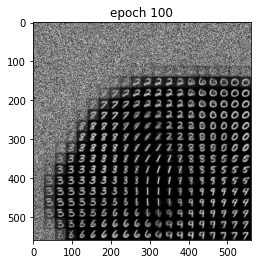

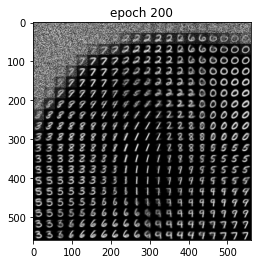

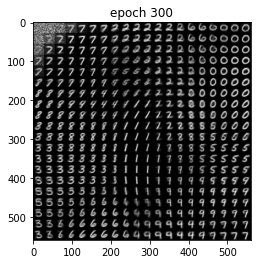

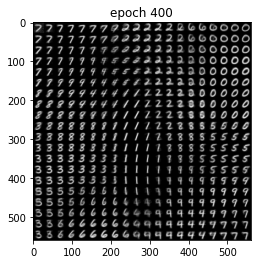

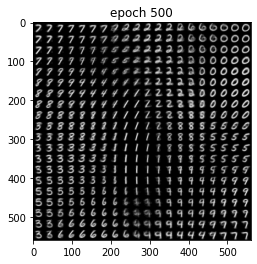

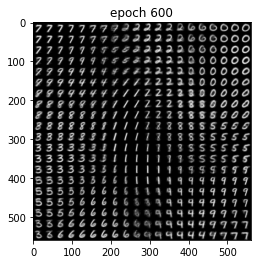

In [ ]:
# Q1_graded
training(learning_rate, radius)

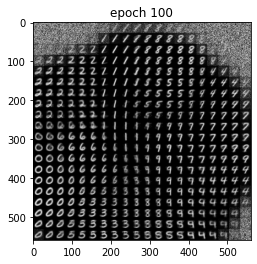

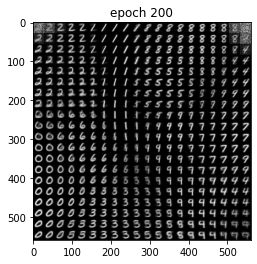

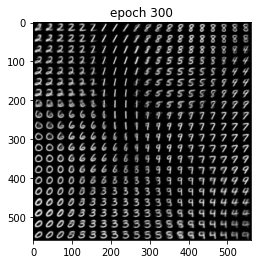

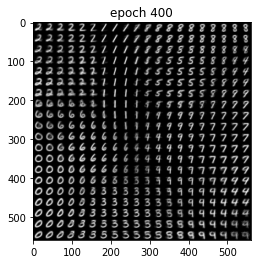

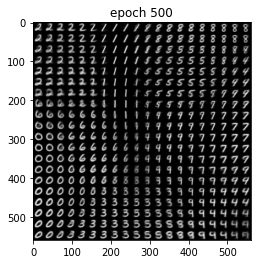

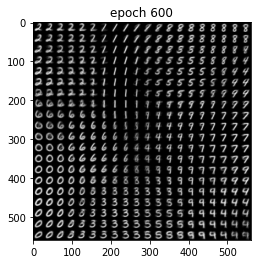

In [ ]:
# Q1_graded
training(learning_rate, radius, True)

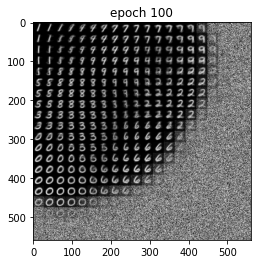

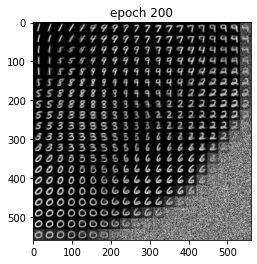

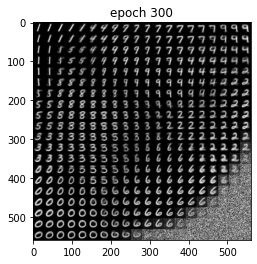

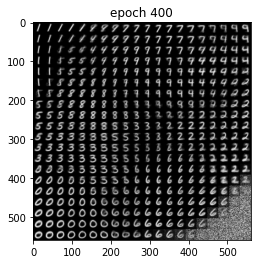

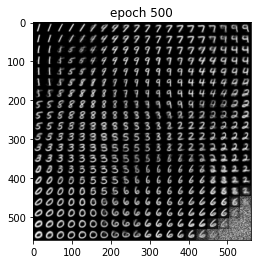

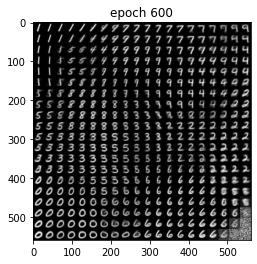

In [ ]:
# Q1_graded
training(learning_rate, radius, False, True)

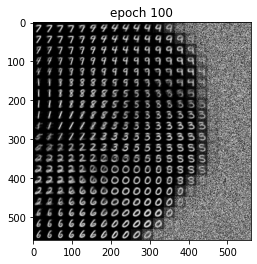

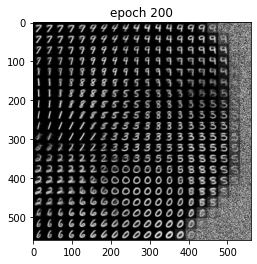

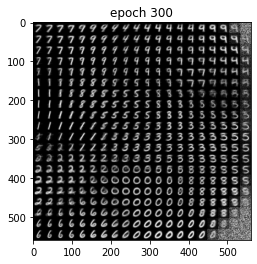

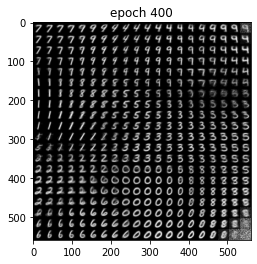

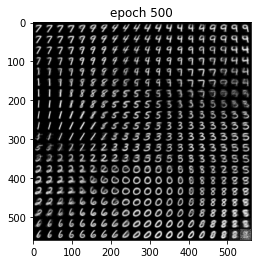

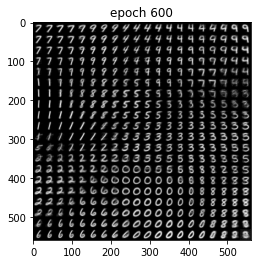

In [ ]:
# Q1_graded
training(learning_rate, radius, True, True)

# Q4. RBF



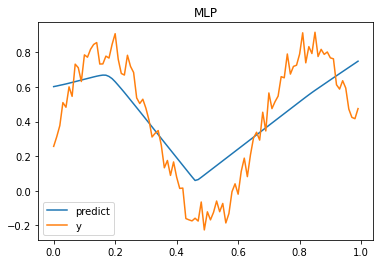

In [24]:
 # Q4_graded
import keras
from keras.layers import *
from keras.optimizers import *
from keras.models import Model

import math
import numpy as np
import matplotlib.pyplot as plt


x = np.arange(0, 100).reshape(-1,1) / 100
mu = np.random.uniform(-0.1,0.1,(100,1))
y = 1/3 + 0.5 * np.sin(3*x*math.pi) + mu

inputs = Input(shape=(1,))
h = Dense(256, activation="relu")(inputs)
h = Dense(128, activation="relu")(h)
h = Dense(32, activation="relu")(h)
outputs = Dense(1, activation="linear")(h)
model = Model(inputs=inputs,outputs=outputs)

model.compile(loss='mean_squared_error', optimizer='SGD')

model.fit(x, y, epochs=1000, batch_size=32, verbose= 0)

pred = model.predict(x)

plt.plot(x, pred)
plt.plot(x ,y)
plt.title('MLP')
plt.legend(["predict", "y"])
plt.show()

In [3]:
 # Q4_graded
import numpy as np
import matplotlib.pyplot as plt
import math

In [16]:
 # Q4_graded
def Gaussian(x, dot, dev): 
    return np.exp(-1 / (2 * dev**2) * (x-dot)**2)

In [21]:
 # Q4_graded
def RBF_train(X, y, k, learning_rate, epochs=1000, epsilon=0.00001):
    dots = np.random.choice(X, size=k)
    prev = dots.copy()
    dev = np.zeros(k)
    is_finished = False

    w = np.random.randn(k)
    b = np.random.randn(1)

    while not is_finished:
        distances = np.abs(X[:, np.newaxis] - dots[np.newaxis, :])

        best_dot = np.argmin(distances, axis=1)

        for i in range(k):
            selected_data = X[best_dot == i]
            if len(selected_data) > 0:
                dots[i] = np.average(selected_data, axis=0) 

        is_finished = np.linalg.norm(dots - prev) < epsilon
        prev = dots.copy()

    distances = np.abs(X[:, np.newaxis] - dots[np.newaxis, :])
    best_dot = np.argmin(distances, axis=1)

    for i in range(k):
        dev[i] = np.std(X[best_dot == i])

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            z = np.array([Gaussian(X[i], dots[j], dev[j]) for j in range(len(dots))])
            H = z.T.dot(w) + b
    
            e = -(y[i] - H)

            w = w - learning_rate * z * e
            b = b - learning_rate * e
    return w, b, dots, dev

In [22]:
 # Q4_graded
def predict(X, w, b, dots, dev):
    predictions = []
    for i in range(X.shape[0]):
        z = np.array([Gaussian(X[i], dots[j], dev[j]) for j in range(len(dots))])
        H = z.T.dot(w) + b
        predictions.append(H)
    return predictions

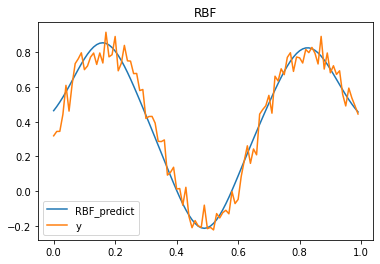

In [23]:
 # Q4_graded
X = np.arange(0, 100) / 100
mu = np.random.uniform(-0.1,0.1,100)
y = 1/3 + 0.5 * np.sin(3*X*math.pi) + mu

RBF_w, RBF_b, RBF_dots, RBF_dev = RBF_train(X, y, 3, 0.01, 1000)

RBF_pred = predict(X, RBF_w, RBF_b, RBF_dots, RBF_dev)

plt.plot(X, RBF_pred)
plt.plot(X, y)
plt.legend(["RBF_predict", "y"])
plt.title('RBF')
plt.show()

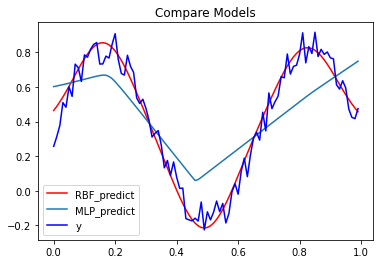

In [27]:
  # Q4_graded
# Do not change the above line.
plt.plot(X, RBF_pred,'r')
plt.plot(x, pred)
plt.plot(X, y,'b')
plt.legend(["RBF_predict","MLP_predict", "y"])
plt.title('Compare Models')
plt.show()
# Type your code here

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID.
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q1_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/bdpVdvr/image.png)
  
    You should upload your **codes** and your **notebook** in `HW2` section and your final report for all of the questions as a **single pdf** file in `HW2 - Report`. Autograder will automatically check for:
    - `CI002_HW2.ipynb`
    - `Q1.py`
    - `Q4.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.